## Importing Libraries

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
%matplotlib inline

## Loading the data 

In [102]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

Text(0, 0.5, 'Count')

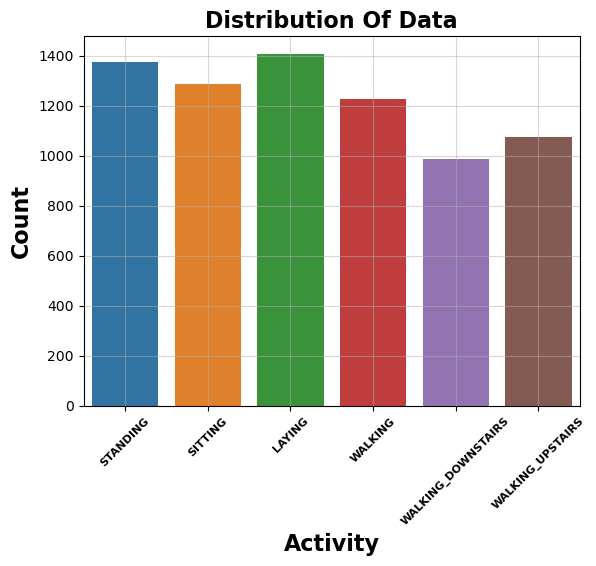

In [103]:
sns.countplot(x=train_data.iloc[:,-1],data=train_data)
plt.xticks(weight='bold',fontsize=8,rotation=45)
plt.title('Distribution Of Data',weight='bold',fontsize=16)
plt.xlabel("Activity",weight='bold',fontsize=16)
plt.grid(alpha=0.5)
plt.ylabel("Count",weight='bold',fontsize=16)

In [104]:
features=train_data.columns

### How data looks like

In [105]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [106]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


## using label encoder

In [107]:
train_data.Activity=train_data.Activity.map({
    'STANDING':1,
    'SITTING':2,
    'LAYING':3,
    'WALKING':4,
    'WALKING_DOWNSTAIRS':5,
    'WALKING_UPSTAIRS':6
})
test_data.Activity=test_data.Activity.map({
    'STANDING':1,
    'SITTING':2,
    'LAYING':3,
    'WALKING':4,
    'WALKING_DOWNSTAIRS':5,
    'WALKING_UPSTAIRS':6
})

In [108]:
train_data.Activity.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

### How big is data

In [109]:
train_data.shape

(7352, 563)

## Without using feature selection, Training Logistic regression on 563 columns

In [110]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [111]:
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values
x_test=test_data.iloc[:,:-1].values
y_test=test_data.iloc[:,-1].values

In [112]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7352, 562)
(7352,)
(2947, 562)
(2947,)


In [113]:
lr.fit(x_train,y_train)

C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## prediction

In [114]:
y_pred=lr.predict(x_test)

In [115]:
y_pred

array([1, 1, 1, ..., 6, 6, 6], dtype=int64)

## Evaluating the model

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [117]:
accuracy_score(y_test,y_pred)

0.9524940617577197

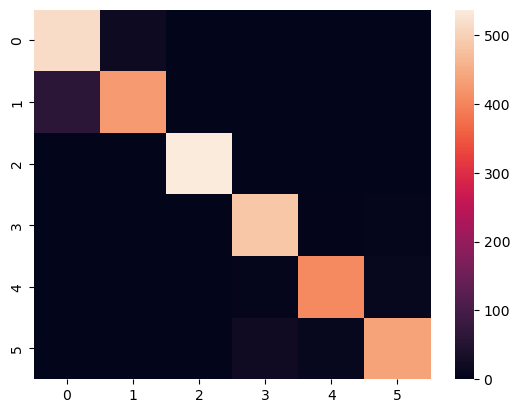

In [118]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)
plt.show()

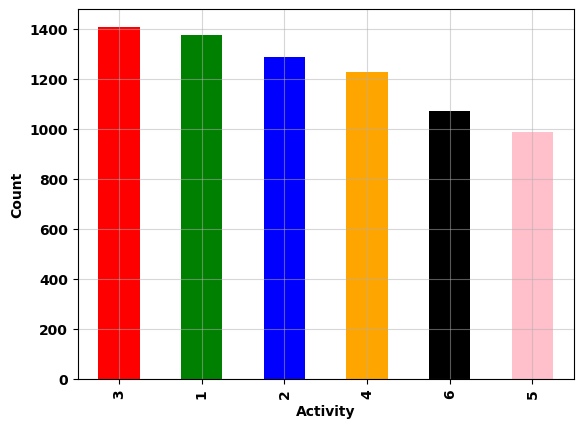

In [119]:
train_data.Activity.value_counts().plot(kind='bar',color=['r','g','b','orange','k','pink'])
plt.xlabel('Activity',weight='bold')
plt.ylabel('Count',weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.grid(alpha=0.5)
plt.show()

In [120]:
x_train=pd.DataFrame(x_train,columns=features[:-1])
x_test=pd.DataFrame(x_test,columns=features[:-1])

# Applying Feature Selection Techiniques

## 1. Check the duplicate features

In [121]:
x_train.T[x_train.T.duplicated()==True].index

Index(['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()',
       'tGravityAccMag-sma()', 'tGravityAccMag-energy()',
       'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()',
       'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2',
       'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4',
       'tBodyAccJerkMag-sma()', 'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-sma()',
       'fBodyAccMag-sma()', 'fBodyBodyAccJerkMag-sma()',
       'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-sma()'],
      dtype='object')

In [122]:
x_train.shape

(7352, 562)

## 1. To remove the duplicate features

In [123]:
x_train=train_data.loc[:,~train_data.T.duplicated(keep='first')]
x_test=test_data.loc[:,~test_data.T.duplicated(keep='first')]

In [124]:
print(x_train.shape)
print(x_test.shape)

(7352, 542)
(2947, 542)


## 1 Variance Threshold method

In [125]:
columns=x_train.columns

In [126]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.05)

In [127]:
sel.fit(x_train)

VarianceThreshold(threshold=0.05)

### To know features whose value is less and greater than threshold

In [128]:
sel.get_support() #false: < threshold and true:>threshold

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,

## Columns which pass variance > thereshold

In [129]:
c=x_train.T[sel.get_support()].index

In [130]:
c

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=351)

## To get rid of features less than threshlod

In [131]:
x_train=sel.transform(x_train)
x_test=sel.transform(x_test)

In [132]:
print(x_train.shape)
print(x_test.shape)

(7352, 351)
(2947, 351)


In [133]:
x_train=pd.DataFrame(x_train,columns=c)

In [134]:
x_test=pd.DataFrame(x_test,columns=c)

## Correlation Method

**This method uses Pearson's correlation coefficients for finding the Linear realtionship b/w two features or realtionship b/w the feature and output. Helps to reduce the multicollinearity, which inturn reduces the number of features**

<AxesSubplot:>

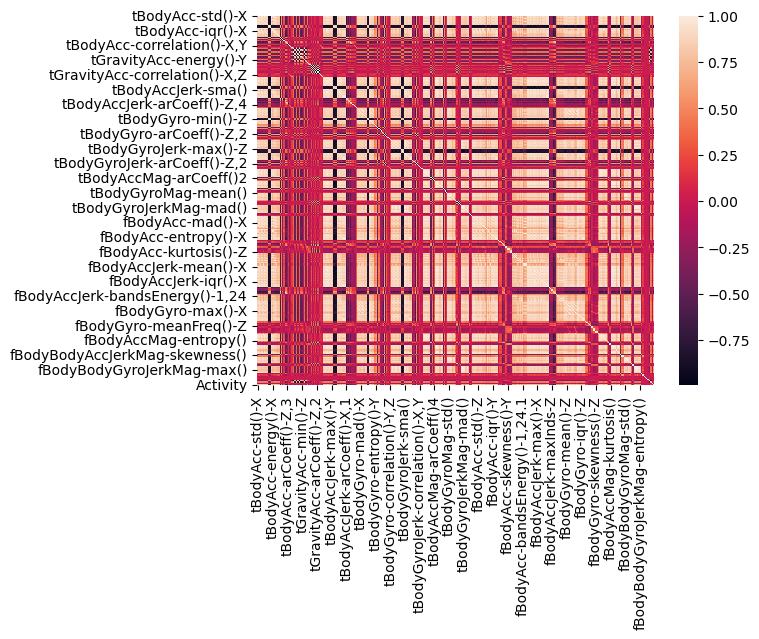

In [135]:
sns.heatmap(x_train.corr())

## Find the correlation matrix which stores the corr b/w each features and o/p

In [136]:
corr_matrix=x_train.corr()
#store columns in the corr_matrix
columns=corr_matrix.columns
#store the columns which we need to drop
columns_to_drop=[]
# look for multi-collinearity by Specifying the Threshold
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        #access corr of each feature with every other feature
        if corr_matrix.loc[columns[i],columns[j]]>0.95:
            columns_to_drop.append(columns[j]) #e.g. f1-f2=0.95 droping f2 
            #other way is to find after this corr with o/p the feature wch having max keep that one and drop other one
#number of columns to drop
len(columns_to_drop) #it has included repition also e.g. f1-f4=0.96 and f2-f4=0.97 f2 included twice like that
columns_to_drop=set(columns_to_drop)
print(len(columns_to_drop))

197


### Dropping these columns

In [137]:
x_train.drop(columns=columns_to_drop,axis=1,inplace=True)
x_test.drop(columns=columns_to_drop,axis=1,inplace=True)

## New how many features remained

In [138]:
print(x_train.shape) # 154 features

(7352, 154)


## Annova

In [139]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [140]:
sel=SelectKBest(f_classif,k=100).fit(x_train,y_train)#f_classif means perform annova on each feature then slect best 100 among them
columns=x_train.columns[sel.get_support()] #returns best 100 columns

C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [141]:
x_train=sel.transform(x_train)
x_test=sel.transform(x_test)

In [142]:
#new df
x_train=pd.DataFrame(x_train,columns=columns)
x_test=pd.DataFrame(x_test,columns=columns)

In [143]:
x_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,-0.995279,-0.983111,-0.913526,-0.744413,0.852947,0.685845,0.814263,-0.407747,-0.679338,-0.602122,...,-0.999454,-0.793103,-0.988175,0.346989,-0.516080,-0.128989,-0.841247,0.179941,-0.058627,1.0
1,-0.998245,-0.975300,-0.960322,-0.818409,0.849308,0.685845,0.822637,-0.714892,-0.500930,-0.570979,...,-0.999856,-1.000000,-0.989549,0.532061,-0.624871,-0.271958,-0.844788,0.180289,-0.054317,1.0
2,-0.995380,-0.967187,-0.978944,-0.818409,0.843609,0.682401,0.839344,-0.592235,-0.485821,-0.570979,...,-0.999954,-0.862069,-0.999890,0.660795,-0.724697,-0.212728,-0.848933,0.180637,-0.049118,1.0
3,-0.996091,-0.983403,-0.990675,-0.829711,0.843609,0.682401,0.837869,-0.627446,-0.850930,-0.911872,...,-0.999931,-1.000000,-0.995562,0.678921,-0.701131,-0.035684,-0.848649,0.181935,-0.047663,1.0
4,-0.998139,-0.980817,-0.990482,-0.824705,0.849095,0.683250,0.837869,-0.786553,-0.559477,-0.761434,...,-0.999926,-1.000000,-0.982177,0.559058,-0.528901,-0.273582,-0.847865,0.185151,-0.043892,1.0


In [144]:
x_train.shape

(7352, 100)

## Applying the Logistic Regression On New Data

In [145]:
lr.fit(x_train,y_train)

C:\Users\suhaib mukhtar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
ypp=lr.predict(x_test)

In [147]:
accuracy_score(y_test,ypp)

0.995928062436376

In [148]:
from sklearn.metrics import confusion_matrix,classification_report

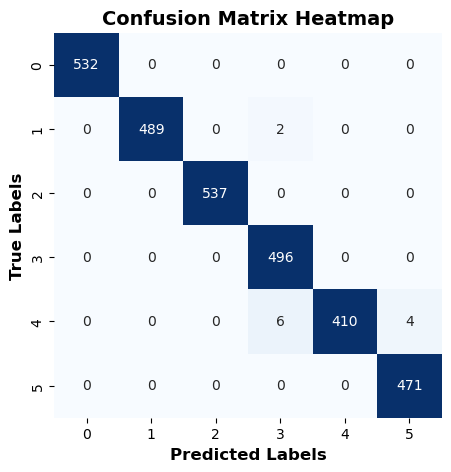

In [158]:
cm=confusion_matrix(y_test,ypp)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, vmin=0, vmax=100)
plt.xlabel('Predicted Labels',weight='bold',fontsize=12)
plt.ylabel('True Labels',weight='bold',fontsize=12)
plt.title('Confusion Matrix Heatmap',weight='bold',fontsize=14)
plt.show()


In [162]:
cr=classification_report(y_test,ypp)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       532
           2       1.00      1.00      1.00       491
           3       1.00      1.00      1.00       537
           4       0.98      1.00      0.99       496
           5       1.00      0.98      0.99       420
           6       0.99      1.00      1.00       471

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



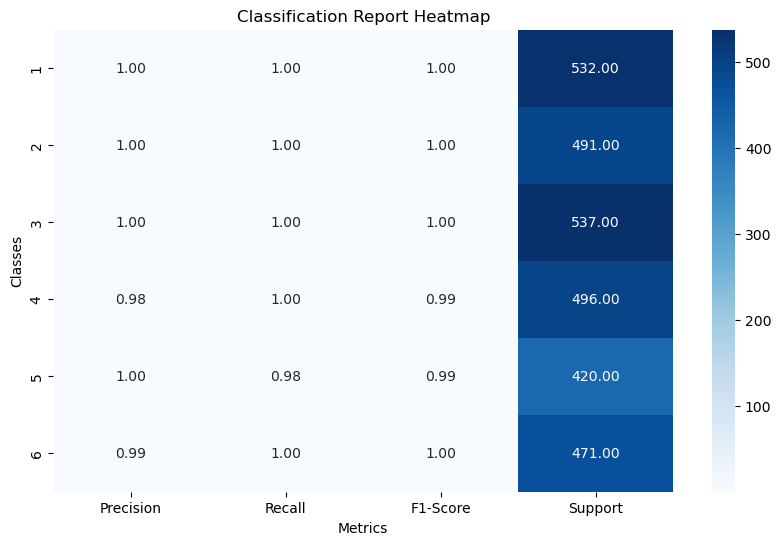

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample classification report data (replace this with your actual data)
data = {
    'Class': [1, 2, 3, 4, 5, 6],
    'Precision': [1.00, 1.00, 1.00, 0.98, 1.00, 0.99],
    'Recall': [1.00, 1.00, 1.00, 1.00, 0.98, 1.00],
    'F1-Score': [1.00, 1.00, 1.00, 0.99, 0.99, 1.00],
    'Support': [532, 491, 537, 496, 420, 471]
}

# Create a DataFrame from the classification report data
cr_df = pd.DataFrame(data)

# Set the 'Class' column as the index
cr_df.set_index('Class', inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cr_df, annot=True, cmap='Blues', fmt=".2f", cbar=True)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


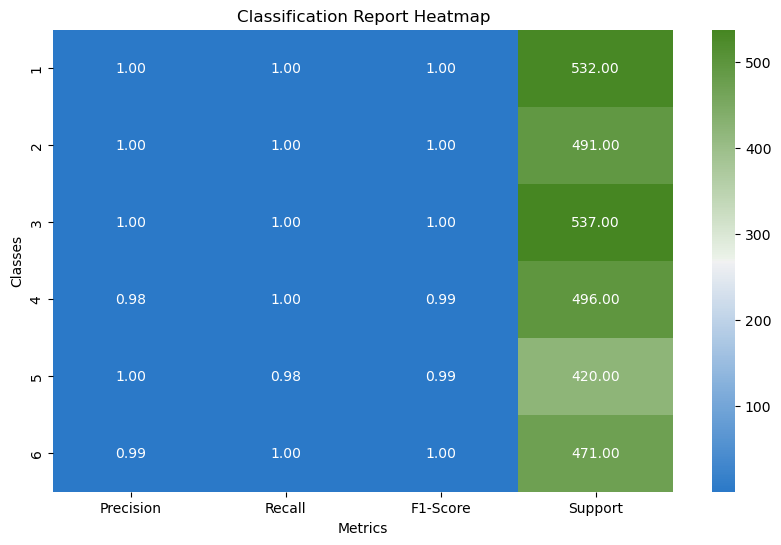

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample classification report data (replace this with your actual data)
data = {
    'Class': [1, 2, 3, 4, 5, 6],
    'Precision': [1.00, 1.00, 1.00, 0.98, 1.00, 0.99],
    'Recall': [1.00, 1.00, 1.00, 1.00, 0.98, 1.00],
    'F1-Score': [1.00, 1.00, 1.00, 0.99, 0.99, 1.00],
    'Support': [532, 491, 537, 496, 420, 471]
}

# Create a DataFrame from the classification report data
cr_df = pd.DataFrame(data)

# Set the 'Class' column as the index
cr_df.set_index('Class', inplace=True)

# Define custom colormap with blue and pink colors
custom_cmap = sns.diverging_palette(250, 120, s=90, l=50, as_cmap=True)

# Plot the heatmap using the custom colormap
plt.figure(figsize=(10, 6))
sns.heatmap(cr_df, annot=True, cmap=custom_cmap, fmt=".2f", cbar=True)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()
